<a href="https://colab.research.google.com/github/sharma-vidhi/Machine-Learning/blob/master/CSE_519_Python_for_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python for Data Science

This tutorial follows the data science pipeline:

(0. Python basics)
1. Get / collect data
2. Manipulate and process data
3. Modeling and analysis
4. Visualize, evaluate, present, and communicate

# 0. Python Basics

In [ ]:
print("Hello world?")

Hello world?


## ____________________________________________________________________________
## 0.1 Loops

In [ ]:
list_sentence = ['A', 'List', 'of', 'Words']
# Three different for loops

In [ ]:
# 1. Indexing by range
for i in range(len(list_sentence)):
    print(list_sentence[i] + "!")

A!
List!
of!
Words!


In [ ]:
# 2. Iterate over elements
for word in list_sentence:
    print(word + "...")

A...
List...
of...
Words...


In [ ]:
# 3. Enumerate
for i, word in enumerate(list_sentence):
    print(list_sentence[i], "---", word)

A --- A
List --- List
of --- of
Words --- Words


## ____________________________________________________________________________
## 0.2 List Comprehension

In [ ]:
list_sentence = ['One', 'must', 'imagine', 'Sisyphus', 'happy']

In [ ]:
# Using a for loop and conditionals
list_2 = []
for element in list_sentence:
    if element[0].isupper():
        list_2.append(element)
print(list_2)

['One', 'Sisyphus']


In [ ]:
# Using list comprehension
list_2 = [x for x in list_sentence if x[0].isupper()]
print(list_2)

['One', 'Sisyphus']


## ____________________________________________________________________________
## 0.3 Functions

In [ ]:
# Normal function that does simple string manipulation
def excite_string(input_string):
    return input_string + "!!!"

In [ ]:
# Lambda function doing the same thing
exciter = lambda x : x + "!!!"

**Lambda functions show their power when they are used as anonymous functions inside another function. Good examples of this are in Pandas .apply() and in list sorting (see section 0.4).**

In [ ]:
test_string = "I love data science"

function_result = excite_string(test_string)
lambda_result = exciter(test_string)

print(function_result)
print(lambda_result)

I love data science!!!
I love data science!!!


**Keyword Arguments**

In [ ]:
# Another function doing a similar string manipulation having multiple arguments
def excite_string_multi_args(input_string, excitement_level=3, excitement_character='!'):
    for _ in range(excitement_level):
        input_string += excitement_character
    return input_string

In [ ]:
excite_string_multi_args("I love data science", "#", 5) # something wrong?

TypeError: 'str' object cannot be interpreted as an integer

In [ ]:
# calling a function by passing arguments using keywords
excite_string_multi_args(
    input_string="I love data science",
    excitement_character="#",
    excitement_level=5,
)

'I love data science#####'

**None as default values vs mutable object as default values**

For a detailed explanation of this behavior: https://docs.python.org/3/reference/compound_stmts.html#function-definitions

---



In [ ]:
# Illustration of why you should never set a mutable object as a default value
# Instead set None as default and manually assign the desired default object inside the function

def append_10_bad(input_list = []):
    input_list.append(10)
    return input_list


def append_10_good(input_list = None):
    if input_list is None:
        input_list = []
    input_list.append(10)
    return input_list


bad_list_1 = append_10_bad()
bad_list_2 = append_10_bad()

good_list_1 = append_10_good()
good_list_2 = append_10_good()


print(f"bad_list_1 = {bad_list_1}")
print(f"bad_list_2 = {bad_list_1}")


print(f"good_list_1 = {good_list_1}")
print(f"good_list_2 = {good_list_2}")

bad_list_1 = [10, 10]
bad_list_2 = [10, 10]
good_list_1 = [10]
good_list_2 = [10]


## ____________________________________________________________________________
## 0.4 Dictionaries & Sets

In [ ]:
# Convert our previous list to a dictionary with character counts
def list_to_count_dict(input_list):

    count_dict = {}
    for word in input_list:
        for letter in word:
            if letter not in count_dict:
                count_dict[letter] = 0

            count_dict[letter] += 1

    return count_dict

#----------------------------------------------------------------#
test_dict = list_to_count_dict(list_sentence)
print(test_dict)

{'O': 1, 'n': 2, 'e': 2, 'm': 2, 'u': 2, 's': 3, 't': 1, 'i': 3, 'a': 2, 'g': 1, 'S': 1, 'y': 2, 'p': 3, 'h': 2}


In [ ]:
print(test_dict.keys())

dict_keys(['O', 'n', 'e', 'm', 'u', 's', 't', 'i', 'a', 'g', 'S', 'y', 'p', 'h'])


In [ ]:
print(test_dict.values())

dict_values([1, 2, 2, 2, 2, 3, 1, 3, 2, 1, 1, 2, 3, 2])


In [ ]:
print(test_dict.items())

dict_items([('O', 1), ('n', 2), ('e', 2), ('m', 2), ('u', 2), ('s', 3), ('t', 1), ('i', 3), ('a', 2), ('g', 1), ('S', 1), ('y', 2), ('p', 3), ('h', 2)])


In [ ]:
print(list(test_dict.items()))

[('O', 1), ('n', 2), ('e', 2), ('m', 2), ('u', 2), ('s', 3), ('t', 1), ('i', 3), ('a', 2), ('g', 1), ('S', 1), ('y', 2), ('p', 3), ('h', 2)]


In [ ]:
# Sort the pairs and print in order
count_list = list(test_dict.items())
#count_list.sort(reverse=False)
count_list.sort(key = lambda x : x[1], reverse=True)
for pair in count_list:
    print(pair[0], pair[1])

s 3
i 3
p 3
n 2
e 2
m 2
u 2
a 2
y 2
h 2
O 1
t 1
g 1
S 1


By default most data structures in Python are **unordered** (Hashables).

But you can find ordered versions of data structures in other libraries.

In [ ]:
# How sets are defined
# By default most data structures in Python are unordered
some_random_set = {99, 1, 2, 3, 4, 5}
print(type(some_random_set))
print(f"some_random_set = {some_random_set}")

<class 'set'>
some_random_set = {1, 2, 99, 3, 4, 5}


## ____________________________________________________________________________
## 0.5 Time Complexity of Data Structures in Python

In [ ]:
import time

# List operations and their complexities
start_time = time.time()
example_list = [0 for _ in range(100000000)] # O(n)
print(f"O(n) List Creation: {(time.time() - start_time)*1000:.2f} ms\n")
print(f"length of example_list, n = {len(example_list)}\n")

start_time = time.time()
example_list.append(6)  # O(1)
print(f"O(1) Append operation on list: {(time.time() - start_time)*1000:.2f} ms")

start_time = time.time()
example_list.insert(50000000, 99)  # O(n)
print(f"O(n) Insert operation on list: {(time.time() - start_time)*1000:.2f} ms")

# Set operations and their complexities
start_time = time.time()
example_set = set(example_list) # O(n)
print(f"O(n) Converting a list to a set: {(time.time() - start_time)*1000:.2f} ms")
start_time = time.time()
example_set.add(101)  # O(1)
print(f"O(1) Add operation on set: {(time.time() - start_time)*1000:.2f} ms")


O(n) List Creation: 4782.92 ms

length of example_list, n = 100000000

O(1) Append operation on list: 0.08 ms
O(n) Insert operation on list: 56.06 ms
O(n) Converting a list to a set: 1442.39 ms
O(1) Add operation on set: 0.13 ms


**Garbage Collector in Python**

Python uses an intelligent garbage collector that will free a memory whenever no active variable in the code is referring to that memory. But you can manually decide to free a memory which sometimes can come in handy.

In [ ]:
# how to use del to free memory
example_list = [1, 2, 3]
print(f"example list = {example_list}")
del example_list
print(f"example list = {example_list}")


example list = [1, 2, 3]


NameError: name 'example_list' is not defined

## ____________________________________________________________________________
## 0.6 True Copy vs Reference

Python does not do a true copy for mutable objects during assignment. Instead two different variables point to the same object when we do "a = b". Unlike its predecessors (such as C), Python itself manages the reference/pointer mechanism. But this can sometimes lead to bugs that are awfully difficult to notice.

In [ ]:
# Python copies reference during assignment, does not copy the actual content

A = [1, 2, 3]
B = A
print(f"A = {A}")
print(f"B = {B}\n")

A[0] = 5
print(f"A = {A}")
print(f"B = {B}\n")

B[1] = 7
print(f"A = {A}")
print(f"B = {B}\n")



A = [1, 2, 3]
B = [1, 2, 3]

A = [5, 2, 3]
B = [5, 2, 3]

A = [5, 7, 3]
B = [5, 7, 3]



In [ ]:
# use copy.deepcopy if you want to make a real copy

import copy
A = [1, 2, 3]
B = A
C = copy.deepcopy(A)
C = A[:]
print(C)
print(f"A = {A}")
print(f"B = {B}")
print(f"C = {C}\n")

A[0] = 5
print(f"A = {A}")
print(f"B = {B}")
print(f"C = {C}\n")

B[1] = 7
print(f"A = {A}")
print(f"B = {B}")
print(f"C = {C}\n")

C[0] = 9
print(f"A = {A}")
print(f"B = {B}")
print(f"C = {C}\n")


[1, 2, 3]
A = [1, 2, 3]
B = [1, 2, 3]
C = [1, 2, 3]

A = [5, 2, 3]
B = [5, 2, 3]
C = [1, 2, 3]

A = [5, 7, 3]
B = [5, 7, 3]
C = [1, 2, 3]

A = [5, 7, 3]
B = [5, 7, 3]
C = [9, 2, 3]



In [ ]:
# The same is true for passing mutable objects as arguments to functions

def append_10(input_list):
    input_list.append(10)
    return input_list

example_input = [1, 2]
example_output = append_10(example_input)
example_output.append(99)
print(f"example_output = {example_output}")
print(f"example_input = {example_input}")

example_output = [1, 2, 10, 99]
example_input = [1, 2, 10, 99]


## ____________________________________________________________________________
## 0.7 Always Use Numpy (if possible)!

**Numpy**: N-dimensional arrays, Matrices and Linear Algebra

Arguably, Python became the language for Machine Learning because of Numpy.

Python is slow. Python with Numpy is fast! Almost close to C++

In [ ]:
import numpy as np
import time

# Creating a large array
size = 1_000_000
array = np.random.rand(size)
print(array[0])
# Using a Python for loop
start_time = time.time()
result_loop = [x*2 for x in array]
loop_time = time.time() - start_time
print(f"Time using Python for loop: {loop_time:.6f} seconds")

# Using NumPy vectorization
start_time = time.time()
result_vectorized = array * 2
numpy_time = time.time() - start_time
print(f"Time using NumPy vectorization: {numpy_time:.6f} seconds")
print(f"Numpy was {loop_time/numpy_time} times faster than regular loop for an array with 1 million numbers")
# Complexity notes:
# - Python for loop: O(n)
# - NumPy vectorization: O(n)(but with much less overhead)


0.519942018073843
Time using Python for loop: 0.171838 seconds
Time using NumPy vectorization: 0.002024 seconds
Numpy was 84.90305100718577 times faster than regular loop for an array with 1 million numbers


## ____________________________________________________________________________
## 0.8 File I/O

Types of general files you may encounter:

**.csv** or **.txt**\
**.sql** or **.sqlite**\
**.json**\
**.pickle**\
**.npy**\
**.hdf5**\
**.spss**

In [ ]:
import csv # .csv
import sqlite3 # .sqlite
import json # .json
import pickle # .pickle

#import numpy as np # .npy
#import h5py # .hdf5
#import pyreadstat # .spss
#import pandas as pd

In [ ]:
# Write a test file
with open("test_file.txt", 'w') as f:
    f.write("This is the file I/O test\n")
    f.write("Split across many lines\n")
    f.write("To demonstrate data streaming\n")

In [ ]:
# Read the entire contents from the test file
with open("test_file.txt", 'r') as f:
    lines = f.read()

    print(lines[:-1] + "!")

This is the file I/O test
Split across many lines
To demonstrate data streaming!


In [ ]:
# Stream the contents of the test file one line at a time
with open("test_file.txt", 'r') as f:
    line = f.readline()
    while line:
        print(line[:-1] + "!")
        line = f.readline()

This is the file I/O test!
Split across many lines!
To demonstrate data streaming!


In [ ]:
# Write the counts dictionary to a pickle file
with open("test_pickle_file.pkl", 'wb') as pkl_file:
    pickle.dump(test_dict, pkl_file)

In [ ]:
# Read the counts dictionary from a pickle file
with open("test_pickle_file.pkl", 'wb') as pkl_file:
    test_dict_2 = dict(pickle.load(pkl_file))

UnsupportedOperation: read

In [ ]:
print(test_dict == test_dict_2)

test_dict_2['O'] += 1
print(test_dict == test_dict_2)

True
False


## ____________________________________________________________________________
## 0.9 The Python Ecosystem

<figure>
<center>
<img src='http://chris35wills.github.io/courses/pydata_stack.png' height=400 width=800/>
<figcaption></figcaption></center>
</figure>



```
# This is formatted as code
```

* **Numpy**: N-dimensional arrays, Matrices and Linear Algebra
* **Scipy**: Algorithms from linear algebra, optimization, statistics and signal processing
* **Pandas**: Data Manipulation and Analysis
* **Matplotlib**: Data Visualization
* **IPython**: Interactive shell for Python
* **Scikit-learn**: Machine Learning

### Anaconda

* A bundle of data science, machine learning and visualization libraries.

* Contains every library you'd need in this course.

* Easiest way to avoid inter-dependency issues.

#### Installation

1. Go to: https://www.anaconda.com/distribution/

2. Download the installer for your OS and Python version of choice and follow instructions

### Jupyter Notebook

* A browser-based notebook with support for code, text, mathematical expressions, inline plots and other rich media

* This presentation is a Jupyter notebook.

### Colab

* Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

* With Colaboratory you can write and execute code, save and share your analyses, and access powerful computing resources, all for free from your browser.

* This presentation is a Jupyter notebook, on Colab!

# 1. Get / Collect Data

## 1.1 Methods of acquiring data

- create / record the data yourself
- search official records such as the Bureau of Labor Statistics
- collaborate with groups with bespoke data (i.e. Mt. Sinai and WTC first responders)
- check online for existing datasets (i.e. Kaggle)
- scrape the internet/Wikipedia (i.e. Beautiful Soup library)
- **stream data from an API (i.e. Twitter/X)**

# 2. Manipulate and Process Data (with Pandas)

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', 50)

* Pandas is a library for data manipulation and analysis

* Data structures: Series and DataFrame (tabular data)

* Data is loaded in-memory, hence super operations are fast after loading

* Not suitable for large scale tasks since it must load the full data at once

https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

## 2.1 Load and Summarize Data

In [ ]:
census_sample = pd.read_csv('https://github.com/dakota0064/Twitter_Identity/blob/main/data/user_census_sample.csv?raw=true')
census_sample.head()

,user_id_str,bio,location,name,screen_name,protected,verified,followers_count,friends_count,statuses_count,details,inferred_state
0,346767301,"Independent that leans conservative, super pro...","Darrington, Washington",Traci Reuwsaat,tracirei12,False,False,358.0,591.0,7188.0,NaN,WA
1,1626693517,🤱🏻💍🐾🍀,"Canton, IL",sab🌼,its_saybruh,True,False,310.0,572.0,9518.0,NaN,IL
2,151278900,I John 4:8 | I Corinthians 6:19-20 human,MD,jayayenay,janadrewery,False,False,356.0,1039.0,3348.0,NaN,MD
3,800011633661775872,"Now that Trumpolini is out of office, I can co...","New Hampshire, USA",ISUPPORTBIDEN,Cynthiaisone,False,False,2602.0,3984.0,14146.0,NaN,NH
4,3219584740,"Mom first and foremost, Love to travel even t...","Massachusetts, USA",Lisa Lake,lisajlake67,False,False,24.0,60.0,540.0,NaN,MA


In [ ]:
# Process the data to parse the state from the location field

# import pandas as pd
# from twitter_state_parser import parse_location

# census_sample = pd.read_csv('https://github.com/dakota0064/Twitter_Identity/blob/main/data/user_census_sample.csv?raw=true')
# census_sample['location'] = census_sample['location'].fillna("")
# census_sample['inferred_state'] = census_sample['location'].apply(parse_location)
# census_sample.to_csv("data/user_census_sample.csv", index=False)

In [ ]:
# Check the shape of the data
census_sample.shape

(70000, 12)

In [ ]:
# Check the last two rows
census_sample[['bio', 'name', 'details']].tail(2)

,bio,name,details
69998,NaN,NaN,Could not find user with ids: [722544222281203...
69999,NaN,NaN,User has been suspended: [3081895979].


In [ ]:
# Highlight only the bios
census_sample.bio

,bio
0,"Independent that leans conservative, super pro..."
1,🤱🏻💍🐾🍀
2,I John 4:8 | I Corinthians 6:19-20 human
3,"Now that Trumpolini is out of office, I can co..."
4,"Mom first and foremost, Love to travel even t..."
...,...
69995,NaN
69996,NaN
69997,NaN
69998,NaN


In [ ]:
# Show the dtypes for each column
census_sample.dtypes

,0
user_id_str,int64
bio,object
location,object
name,object
screen_name,object
protected,object
verified,object
followers_count,float64
friends_count,float64
statuses_count,float64


In [ ]:
# Show the summary statistics for this data
census_sample.describe()

,user_id_str,followers_count,friends_count,statuses_count
count,7.000000e+04,5.850400e+04,58504.000000,5.850400e+04
mean,4.801192e+16,3.685192e+03,968.158519,1.516687e+04
std,1.836802e+17,6.699724e+04,4367.112995,3.570305e+04
min,2.220000e+02,0.000000e+00,0.000000,0.000000e+00
25%,1.209232e+08,1.930000e+02,220.000000,2.228750e+03
50%,4.633768e+08,4.090000e+02,449.000000,5.776000e+03
75%,2.324896e+09,9.760000e+02,939.000000,1.528000e+04
max,8.149369e+17,9.451301e+06,626262.000000,3.265822e+06


**Pandas provides a large set of summary functions that operate on
different kinds of pandas objects (DataFrame columns, Series,
GroupBy, Expanding and Rolling (see below)) and produce single
values for each of the groups. When applied to a DataFrame, the
result is returned as a Pandas Series for each column.**

- **sum()**
Sum values of each object.

- **count()**
Count non-NA/null values of
each object.

- **median()**
Median value of each object.

- **quantile([0.25,0.75])**
Quantiles of each object.

- **apply(function)**
Apply function to each object.

- **min()**
Minimum value in each object.

- **max()**
Maximum value in each object.

- **mean()**
Mean value of each object.

- **var()**
Variance of each object.

- **std()**
Standard deviation

In [ ]:
# Get the number of rows containing this value for every value of "location"
census_sample['location'].value_counts()

,count
location,
United States,1137
"Los Angeles, CA",1023
"Houston, TX",670
"Chicago, IL",631
"Atlanta, GA",600
...,...
trash country,1
"dallas , tx",1
𝓐𝓵𝓪𝓼𝓴𝓪,1


In [ ]:
census_sample['inferred_state'].value_counts()

,count
inferred_state,
--,25962
CA,6319
TX,5078
NY,3881
FL,2292
IL,1873
GA,1801
PA,1569
NC,1318


## 2.2 Preprocessing

In [ ]:
# Drop duplicates and NA values from specified column
query_column = 'user_id_str'

print("Original length:", len(census_sample))

adjusted_sample = census_sample.drop_duplicates(query_column)
print("Length without duplicates:", len(adjusted_sample))

adjusted_sample[query_column] = census_sample[query_column].dropna()
print("Length without NA values:", len(adjusted_sample))

Original length: 70000
Length without duplicates: 70000
Length without NA values: 70000


In [ ]:
# Drop duplicates and NA values from specified column
query_column = 'location'

print("Original length:", len(census_sample))

adjusted_sample = census_sample.drop_duplicates(query_column)
print("Length without duplicates:", len(adjusted_sample))

adjusted_sample = census_sample[query_column].dropna()
print("Length without NA values:", len(adjusted_sample))

Original length: 70000
Length without duplicates: 18162
Length without NA values: 54220


In [ ]:
# Count null values
census_sample.isnull().sum()

,0
user_id_str,0
bio,20129
location,15780
name,11500
screen_name,11496
protected,11496
verified,11496
followers_count,11496
friends_count,11496
statuses_count,11496


In [ ]:
# Fill NA values in specified column with specified value
census_sample['bio'] = census_sample['bio'].fillna('')
census_sample.isnull().sum()

,0
user_id_str,0
bio,0
location,15780
name,11500
screen_name,11496
protected,11496
verified,11496
followers_count,11496
friends_count,11496
statuses_count,11496


## 2.3 Subset Data

In [ ]:
# Change the index to show the difference between iloc and loc
manipulated_sample = census_sample.set_index('followers_count')
#print(manipulated_sample)

In [ ]:
# Get the 200th sample
manipulated_sample.iloc[200]

,2598.0
user_id_str,21141310
bio,Team #InternetForAll with @ntiagov 👩‍💻. Accent...
location,"Washington, DC"
name,Zoë Meeken
screen_name,zoemeeken
protected,False
verified,False
friends_count,2069.0
statuses_count,2295.0
details,NaN


In [ ]:
# Get all samples where the newly set index equals this value
manipulated_sample.loc[200]

,user_id_str,bio,location,name,screen_name,protected,verified,friends_count,statuses_count,details,inferred_state
followers_count,,,,,,,,,,,
200.0,206127625,"Certified Federal Contract Manager, certified ...","Mechanicsburg, PA",Lynette Stevenson,stevenson1249,False,False,337.0,3230.0,NaN,PA
200.0,27727153,Views expressed are my own #BillsMafia,"Seattle, Wa",Ankur,Ankurksharma,False,False,256.0,1758.0,NaN,WA
200.0,2377362547,"Mama to 👱🏻‍♀️👱🏻‍♀️, 🐶🐶 Life goal: beach bum 🏝P...","Detroit, MI",Rachel Harris,RachelMHarris,False,False,649.0,1659.0,NaN,MI
200.0,767762412959260672,just a girl that listens to hardcore and dress...,"Texas, USA",Deidre 🦇,febru4ryair,False,False,289.0,4760.0,NaN,TX
200.0,2849933498,it is what it is,Somewhere,Lenny,_lcdsv,False,False,208.0,6006.0,NaN,--
...,...,...,...,...,...,...,...,...,...,...,...
200.0,2963349773,Academic Advisor and Graduate student of Histo...,"Manchester, NH",Keva,Keva_Lionface,False,False,1020.0,11189.0,NaN,NH
200.0,2434852424,,NaN,K’s,turina_janelle,False,False,325.0,14058.0,NaN,--
200.0,142540769,Aka Orlando. Aka Brolando. I am a 21st Century...,"Santa Ana, CA",Chie Orogo,soundgardener75,False,False,553.0,5379.0,NaN,CA


In [ ]:
# what if we want to subset all rows where followers_count is > 1000000
# Subset by numerical values
n_followers = 1000000
popular_people = census_sample[census_sample['followers_count'] > n_followers]
print(len(popular_people))

22


In [ ]:
# how element-wise operation, broadcasting, and subsetting work
import numpy as np

# Creating two NumPy arrays
array_a = np.array([0, 1, 2, 3])
array_b = np.array([0, 3, 2, 5,])

# Element-wise comparison between arrays, generating a boolean array
comparison_result = array_a == array_b
print(comparison_result)  # Output: [ True False  True False]

# Broadcasting: Compare each element in array_a to the scalar value 1
broadcast_result = array_a == 1
print(broadcast_result)  # Output: [False  True False False]

# Element-wise comparison to check which elements are greater than 2
greater_than_two = array_a > 2
print(greater_than_two)  # Output: [False False False  True]

# Subsetting using a boolean array: manually created
manual_subset = array_a[np.array([True, True, False, True])]
print(manual_subset)  # Output: [0 1 3]

# Subsetting using a condition-based boolean array
condition_subset = array_a[array_a > 2]
print(condition_subset)  # Output: [3]


[ True False  True False]
[False  True False False]
[False False False  True]
[0 1 3]
[3]


In [ ]:
# broadcasting and subsetting come together

n_followers = 1000000
popular_people = census_sample[census_sample['followers_count'] > n_followers]
print(len(popular_people))

22


In [ ]:
# Fancier subsetting, by bio content
trump_filter = census_sample['bio'].apply(lambda x: 'TRUMP' in x.upper())
print(trump_filter)
print(len(census_sample[trump_filter]))

0        False
1        False
2        False
3         True
4        False
         ...  
69995    False
69996    False
69997    False
69998    False
69999    False
Name: bio, Length: 70000, dtype: bool
172


In [ ]:
# get number of people who errored due to account suspension
# Fill NaN values in details column to avoid errors
census_sample['details'] = census_sample['details'].fillna('')

suspended_filter = census_sample['details'].apply(lambda x: 'SUSPENDED' in x.upper())
print("Num suspended accounts:", len(census_sample[suspended_filter]))

deactivated_filter = census_sample['details'].apply(lambda x: 'FIND' in x.upper())
print("Num deactivated accounts:", len(census_sample[deactivated_filter]))

Num suspended accounts: 2124
Num deactivated accounts: 9372


## 2.4 Add Columns

In [ ]:
census_sample['bio_length'] = census_sample['bio'].apply(lambda x: len(x))
print(census_sample)

              user_id_str                                                bio  \
0               346767301  Independent that leans conservative, super pro...   
1              1626693517                                              🤱🏻💍🐾🍀   
2               151278900           I John 4:8 | I Corinthians 6:19-20 human   
3      800011633661775872  Now that Trumpolini is out of office, I can co...   
4              3219584740  Mom first and foremost,  Love to travel even t...   
...                   ...                                                ...   
69995           114911509                                                      
69996           167920995                                                      
69997           144318934                                                      
69998  722544222281203713                                                      
69999          3081895979                                                      

                     location          

## 2.5 Stratifying Variables


In [ ]:
# Stratify number of followers, friends, tweets

#census_sample['stratified_followers'] = pd.cut(list(census_sample['followers_count']), bins=10)
census_sample['stratified_followers'] = pd.cut(list(census_sample['followers_count']), bins=[0, 100, 1000, 10000, 100000, 1000000, 10000000])
#print(census_sample[['stratified_followers', 'followers_count']])
print(census_sample['stratified_followers'].value_counts())

stratified_followers
(100, 1000]            37537
(1000, 10000]          12325
(0, 100]                6626
(10000, 100000]         1751
(100000, 1000000]        218
(1000000, 10000000]       22
Name: count, dtype: int64


In [ ]:
census_sample['stratified_friends'] = pd.cut(list(census_sample['friends_count']), bins=[0, 100, 1000, 10000, 100000, 1000000, 10000000])
print(census_sample['stratified_friends'].value_counts())

stratified_friends
(100, 1000]            38883
(1000, 10000]          13165
(0, 100]                4896
(10000, 100000]          334
(100000, 1000000]          9
(1000000, 10000000]        0
Name: count, dtype: int64


In [ ]:
census_sample['stratified_tweets'] = pd.cut(list(census_sample['statuses_count']), [0, 100, 1000, 10000, 100000, 1000000, 10000000])
print(census_sample['stratified_tweets'].value_counts())

stratified_tweets
(1000, 10000]          31677
(10000, 100000]        19576
(100, 1000]             5764
(100000, 1000000]       1124
(0, 100]                 350
(1000000, 10000000]        4
Name: count, dtype: int64


In [ ]:
# Encode the new features as one-hot
from sklearn.preprocessing import OneHotEncoder
import numpy as np

enc = OneHotEncoder()
followers_array = np.array(census_sample['stratified_followers']).reshape(-1, 1)
encoded_vectors = enc.fit_transform(followers_array).toarray()
print(encoded_vectors)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


## 2.6 GroupBy

In [ ]:
import copy
grouped_census = copy.deepcopy(census_sample)
grouped_census = grouped_census[['inferred_state', 'followers_count', 'friends_count', 'statuses_count']]
grouped_census = grouped_census.groupby(['inferred_state']).mean()

## 2.7 Sorting

In [ ]:
grouped_census.sort_values(by=['friends_count', "followers_count"], ascending=[False, True])

,followers_count,friends_count,statuses_count
inferred_state,,,
DC,7216.617940,1334.443522,18484.405316
MT,2478.041237,1202.979381,11436.123711
SD,1931.186813,1174.054945,15063.857143
RI,1564.800000,1163.659259,12970.740741
NY,14479.169544,1154.760629,15400.570472
DE,1726.873874,1130.324324,18024.504505
MN,1734.871233,1127.605479,10672.817808
CA,4402.112201,1120.546289,13894.297515
ID,2227.611111,1082.814815,11303.833333


In [ ]:
census_sample.sort_values(by=['bio_length', 'followers_count'], ascending=[False, False])

,user_id_str,bio,location,name,screen_name,protected,verified,followers_count,friends_count,statuses_count,details,inferred_state,bio_length,stratified_followers
57015,18295165,I'm sending a https://t.co/tmCQtmQ5Au invite! ...,"Boca Raton, Florida USA",AvailanetUSAcom,AvailanetUSAcom,False,False,519.0,2662.0,50.0,,--,205,"(100.0, 1000.0]"
38277,41403065,The problem: you don't get the nutrition you n...,AMERICAN-MO,aikijb,LampoonedHerdUS,False,False,330.0,41.0,71997.0,,MO,202,"(100.0, 1000.0]"
67430,15906000,I quit Twitter. Now a Mastodon Evangelist. Sig...,"Lee's Summit, MO, USA",JL Johnson / @user47@vmst.io,user47,False,False,3321.0,1210.0,75550.0,,MO,181,"(1000.0, 10000.0]"
30971,14435489,"#1 Cleveland Guardians Fan, Retired Microsoft ...",Cleveland OHIO,Jim Kenzig,kenzig,False,False,1187.0,1714.0,7117.0,,OH,179,"(1000.0, 10000.0]"
27374,29241377,We are Internationally recognized experts on R...,"Texas, USA",BeckerTime,Beckertime,False,False,895.0,155.0,3770.0,,TX,177,"(100.0, 1000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,114911509,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,User has been suspended: [114911509].,--,0,NaN
69996,167920995,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Could not find user with ids: [167920995].,--,0,NaN
69997,144318934,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Could not find user with ids: [144318934].,--,0,NaN
69998,722544222281203713,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Could not find user with ids: [722544222281203...,--,0,NaN


# 3. Modeling and Analysis

In [ ]:
corr = census_sample[['user_id_str', 'followers_count', 'friends_count', 'statuses_count', 'bio_length', 'protected']].corr(method='pearson')
print(corr)

                 user_id_str  followers_count  friends_count  statuses_count  \
user_id_str         1.000000        -0.007382      -0.016437       -0.049281   
followers_count    -0.007382         1.000000       0.099615        0.084868   
friends_count      -0.016437         0.099615       1.000000        0.106293   
statuses_count     -0.049281         0.084868       0.106293        1.000000   
bio_length         -0.062197         0.029582       0.087275        0.033228   
protected           0.005935        -0.015302      -0.028558        0.009758   

                 bio_length  protected  
user_id_str       -0.062197   0.005935  
followers_count    0.029582  -0.015302  
friends_count      0.087275  -0.028558  
statuses_count     0.033228   0.009758  
bio_length         1.000000  -0.186999  
protected         -0.186999   1.000000  


In [ ]:
protected_users = census_sample[census_sample['protected'] == True]
num_protected = len(protected_users)
print(num_protected)

6164


In [ ]:
# Sampling without Pandas
import random

unprotected_users = census_sample[census_sample['protected'] == False]
#print(len(unprotected_users))
unprotected_users = random.sample(list(unprotected_users['bio_length']), k=num_protected)
print(len(unprotected_users))

6164


In [ ]:
# Sampling with Pandas
unprotected_users = census_sample[census_sample['protected'] == False].sample(n=num_protected)
print(len(unprotected_users))

6164


In [ ]:
# Merge protected and unprotected sample
eval_users = pd.concat([protected_users, unprotected_users])
print(len(eval_users))

# Shuffle the new collection of users
eval_users = eval_users.sample(frac=1).reset_index(drop=True)

12328


In [ ]:
# Split the data into 80% train and 20% test
from sklearn.model_selection import train_test_split

eval_train_data, eval_test_data = train_test_split(eval_users, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
import numpy as np

feature = 'bio_length'

def regression_model(feature, is_categorical=False):
  model = LogisticRegression()
  X = np.array(eval_train_data[feature]).reshape(-1, 1)

  if is_categorical:
    # Encode the features as one-hot
    enc = OneHotEncoder(handle_unknown='ignore')
    encoded_vectors = enc.fit_transform(X).toarray()
    X = encoded_vectors

  Y = np.array(eval_train_data['protected'])
  # Convert Boolean values to integers
  Y = [1 if x else 0 for x in Y]

  model.fit(X, Y)
  print("Regression Model -", feature, "- Train Accuracy:", model.score(X, Y))

  test_X = np.array(eval_test_data[feature]).reshape(-1, 1)
  if is_categorical:
    # Encode the new features as one-hot using same mapping as training data
    encoded_vectors = enc.transform(test_X)
    test_X = encoded_vectors

  test_Y = np.array(eval_test_data['protected'])
  test_Y = [1 if x else 0 for x in test_Y]
  print("Regression Model -", feature, "- Test Accuracy:", model.score(test_X, test_Y))

regression_model(feature)

Regression Model - bio_length - Train Accuracy: 0.6464206043398905
Regression Model - bio_length - Test Accuracy: 0.6411192214111923


In [ ]:
regression_model("followers_count")
regression_model("stratified_followers", is_categorical=True)

Regression Model - followers_count - Train Accuracy: 0.5687487325086189
Regression Model - followers_count - Test Accuracy: 0.5620437956204379
Regression Model - stratified_followers - Train Accuracy: 0.5701683228554045
Regression Model - stratified_followers - Test Accuracy: 0.5612327656123277


In [ ]:
regression_model("friends_count")
regression_model("stratified_friends", is_categorical=True)

Regression Model - friends_count - Train Accuracy: 0.5611437842222673
Regression Model - friends_count - Test Accuracy: 0.572992700729927
Regression Model - stratified_friends - Train Accuracy: 0.562867572500507
Regression Model - stratified_friends - Test Accuracy: 0.559610705596107


In [ ]:
regression_model("statuses_count")
regression_model("stratified_tweets", is_categorical=True)

Regression Model - statuses_count - Train Accuracy: 0.4997972013790306
Regression Model - statuses_count - Test Accuracy: 0.5004055150040552
Regression Model - stratified_tweets - Train Accuracy: 0.5389373352261204
Regression Model - stratified_tweets - Test Accuracy: 0.5429845904298459


In [ ]:
# Refine our function to take a model as a parameter
def predict_protected(features, feature_name, model, model_name, is_categorical):

  full_train_input = []
  full_test_input = []
  encoders = {}

  for i, feature in enumerate(features):
    X = np.array(eval_train_data[feature]).reshape(-1, 1)
    test_X = np.array(eval_test_data[feature]).reshape(-1, 1)

    if is_categorical[i]:
      # Encode the features as one-hot
      enc = OneHotEncoder(handle_unknown='ignore')
      X = enc.fit_transform(X).toarray()
      test_X = enc.transform(test_X).toarray()
      #print(X, test_X)

    if i==0:
      full_train_input = X
      full_test_input = test_X
    else:
      full_train_input = np.concatenate((full_train_input, X), axis=1)
      full_test_input = np.concatenate((full_test_input, test_X), axis=1)

  Y = np.array(eval_train_data['protected'])
  print(full_train_input.shape, Y.shape)
  # Convert Boolean values to integers
  Y = [1 if x else 0 for x in Y]

  model.fit(full_train_input, Y)
  print(model_name, " - ", feature_name, "- Train Accuracy:", model.score(full_train_input, Y))

  test_Y = np.array(eval_test_data['protected'])
  test_Y = [1 if x else 0 for x in test_Y]
  print(model_name, " - ", feature_name, "- Test Accuracy:", model.score(full_test_input, test_Y))

In [ ]:
# Logistic Regression with raw counts
model = LogisticRegression()
#features = ['statuses_count', 'followers_count', 'friends_count']
features = ['statuses_count', 'followers_count']
predict_protected(features, 'Raw Counts',
                  model, 'Logistic Regression',
                  is_categorical=[False, False, False])

(9862, 2) (9862,)
Logistic Regression  -  Raw Counts - Train Accuracy: 0.5791928614885419
Logistic Regression  -  Raw Counts - Test Accuracy: 0.5798864557988646


In [ ]:
# Logistic Regression with stratified variables
model = LogisticRegression()
features = ['stratified_tweets', 'stratified_followers', 'stratified_friends']
predict_protected(features, 'Stratified Vars',
                  model, 'Logistic Regression',
                  is_categorical=[True, True, True])

(9862, 20) (9862,)
Logistic Regression  -  Stratified Vars - Train Accuracy: 0.5973433380653012
Logistic Regression  -  Stratified Vars - Test Accuracy: 0.5871857258718572


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Random Forest with stratified variables
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=100)
features = ['stratified_tweets', 'stratified_followers', 'stratified_friends', 'bio_length']
predict_protected(features, 'Stratified Vars',
                  model, 'Random Forest',
                  is_categorical=[True, True, True, False])

(9862, 21) (9862,)
Random Forest  -  Stratified Vars - Train Accuracy: 0.73940377205435
Random Forest  -  Stratified Vars - Test Accuracy: 0.5916463909164639


In [ ]:
# Random Forest with raw counts
model = RandomForestClassifier(n_estimators=100, max_depth=100)
features = ['statuses_count', 'followers_count', 'friends_count', 'bio_length']
predict_protected(features, 'Raw Counts',
                  model, 'Random Forest',
                  is_categorical=[False, False, False, False])

(9862, 4) (9862,)
Random Forest  -  Raw Counts - Train Accuracy: 1.0
Random Forest  -  Raw Counts - Test Accuracy: 0.6094890510948905


In [ ]:
# Support Vector machine with stratified variables
from sklearn.svm import SVC

model = SVC()
features = ['stratified_tweets', 'stratified_followers', 'stratified_friends', 'bio_length']
predict_protected(features, 'Stratified Vars',
                  model, 'Support Vector Machine',
                  is_categorical=[True, True, True, False])

(9862, 21) (9862,)
Support Vector Machine  -  Stratified Vars - Train Accuracy: 0.6415534374366254
Support Vector Machine  -  Stratified Vars - Test Accuracy: 0.6366585563665855


In [ ]:
# Support Vector machine with raw counts
model = SVC()
features = ['statuses_count', 'followers_count', 'friends_count', 'bio_length']
predict_protected(features, 'Raw Counts',
                  model, 'Support Vector Machine',
                  is_categorical=[False, False, False, False])

(9862, 4) (9862,)
Support Vector Machine  -  Raw Counts - Train Accuracy: 0.5828432366659907
Support Vector Machine  -  Raw Counts - Test Accuracy: 0.5802919708029197


# 4. Visualize and Communicate

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

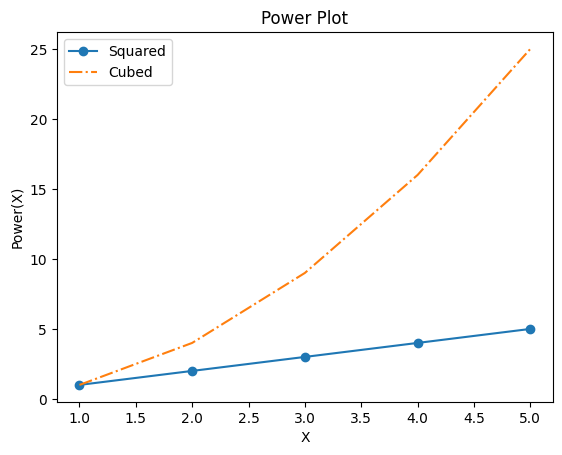

In [ ]:
# Basic Matplotlib plot
nums = [1, 2, 3, 4, 5]

plt.plot(nums, nums, '-o', label="Original")
plt.plot(nums, [x ** 2 for x in nums], '-.', label='Squared')

#plt.legend()
plt.legend(['Squared', 'Cubed'])
plt.xlabel('X')
plt.ylabel('Power(X)')
plt.title('Power Plot')

plt.show()

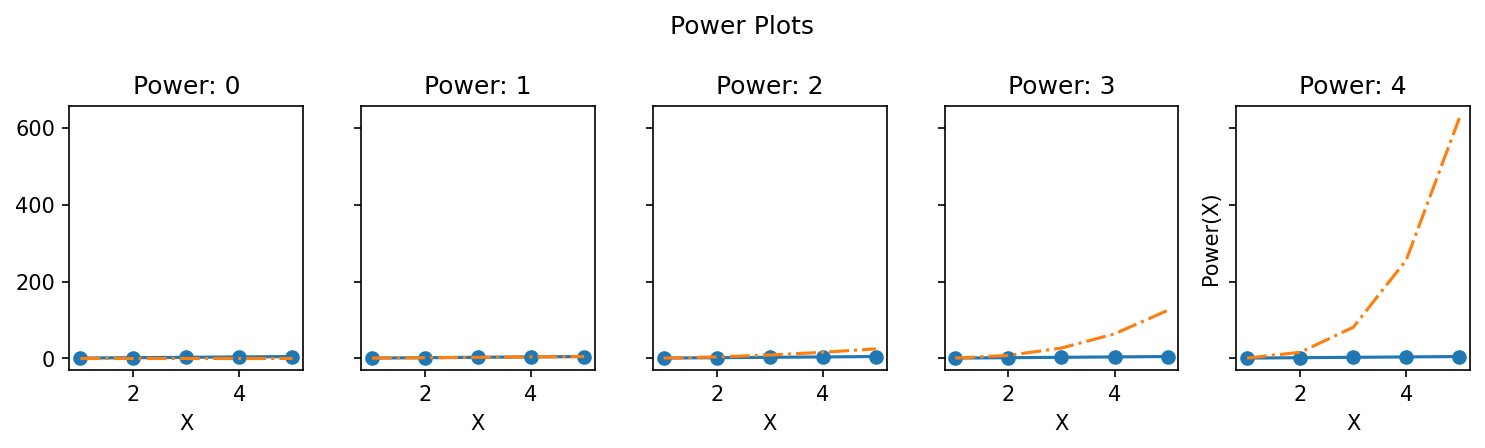

In [ ]:
# Fancier Matplotlib plot
fig, axes = plt.subplots(1, 5, figsize=(10, 3.0), dpi=150, sharey=True)
axes = np.array([axes])
axes = axes.flatten()

for i, ax in enumerate(axes):
  ax.plot(nums, nums, '-o')
  ax.plot(nums, [x ** i for x in nums], '-.')
  ax.set_xlabel('X')
  #ax.set_ylabel('Power(X)')
  ax.set_title("Power: " + str(i))

plt.ylabel('Power(X)')
fig.suptitle('Power Plots')
fig.tight_layout()
plt.show()

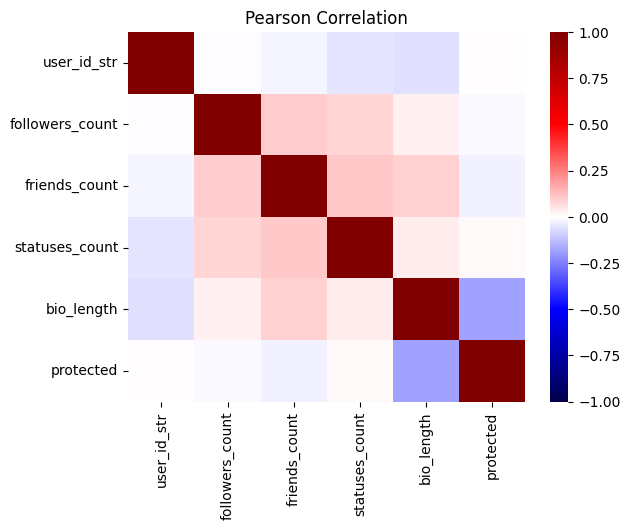

In [ ]:
sns.heatmap(corr, cmap='seismic', vmin=-1.0, vmax=1.0)
plt.title('Pearson Correlation')
plt.show()

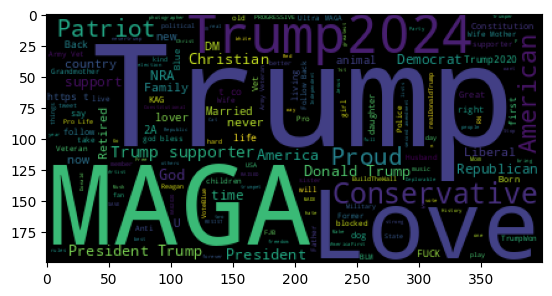

In [ ]:
# Word Cloud of bios that have been filtered by some token criteria

bio_text = ""
for bio in list(census_sample[trump_filter]['bio']):
    bio_text = bio_text + bio + " "

word_cloud = WordCloud()
word_cloud.generate(bio_text)
plt.imshow(word_cloud)
plt.show()

In [ ]:
#!pip install basemap
!git clone https://github.com/dakota0064/Twitter_Identity.git

fatal: destination path 'Twitter_Identity' already exists and is not an empty directory.


In [ ]:
cd Twitter_Identity

/content/Twitter_Identity


In [ ]:
# Function to plot map of US states
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False),
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    #plt.register_cmap(cmap=newcmap)

    return newcmap

def plot_map(token_reps_by_state, national_reps, year=None, title='State Overrepresentation', vmin=0, vmax=50):

    overflow_states = set()

    fig, ax = plt.subplots(figsize=(5, 3), dpi=150)

    # Lambert Conformal map of lower 48 states.
    m = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,
                projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

    # Mercator projection, for Alaska and Hawaii
    m_ = Basemap(llcrnrlon=-190,llcrnrlat=20,urcrnrlon=-143,urcrnrlat=46,
                projection='merc',lat_ts=20)  # do not change these numbers

    #%% ---------   draw state boundaries  ----------------------------------------
    ## data from U.S Census Bureau
    ## http://www.census.gov/geo/www/cob/st2000.html
    shp_info = m.readshapefile('utils/st99_d00','states',drawbounds=True,
                               linewidth=0.45,color='gray')
    shp_info_ = m_.readshapefile('utils/st99_d00','states',drawbounds=False)

    AREA_1 = 0.005  # exclude small Hawaiian islands that are smaller than AREA_1
    AREA_2 = AREA_1 * 30.0  # exclude Alaskan islands that are smaller than AREA_2
    AK_SCALE = 0.19  # scale down Alaska to show as a map inset
    HI_OFFSET_X = -1900000  # X coordinate offset amount to move Hawaii "beneath" Texas
    HI_OFFSET_Y = 250000    # similar to above: Y offset for Hawaii
    AK_OFFSET_X = -250000   # X offset for Alaska (These four values are obtained
    AK_OFFSET_Y = -750000   # via manual trial and error, thus changing them is not recommended.)

    #%% -------- choose a color for each state based on population density. -------
    colors={}
    statenames=[]
    cmap = plt.cm.bwr
    adjusted_cmap = shiftedColorMap(cmap, start=0.0, midpoint=0.5, stop=1.0)
    #cmap = plt.cm.hot_r # use 'reversed hot' colormap
    #vmin = min(list(token_reps_by_state.values()))
    #vmax = max(list(token_reps_by_state.values())) # set range.
    norm = Normalize(vmin=vmin, vmax=vmax)
    for shapedict in m.states_info:
        statename = shapedict['NAME']
        # skip DC and Puerto Rico.
        if statename not in ['District of Columbia','Puerto Rico']:
            if national_reps != 0.0:
                value = token_reps_by_state[statename] / national_reps
            else:
                value = 0.0
            value = norm(value)
            # calling colormap with value between 0 and 1 returns
            # rgba value.  Invert color range (hot colors are high
            # population), take sqrt root to spread out colors more.
            #colors[statename] = cmap(np.sqrt((value-vmin)/(vmax-vmin)))[:3]
            colors[statename] = adjusted_cmap(value)
        statenames.append(statename)

    #%% ---------  cycle through state names, color each one.  --------------------
    for nshape,seg in enumerate(m.states):
        # skip DC and Puerto Rico.
        if statenames[nshape] not in ['Puerto Rico', 'District of Columbia']:
            color = rgb2hex(colors[statenames[nshape]])
            poly = Polygon(seg,facecolor=color,edgecolor=color)
            ax.add_patch(poly)

    for nshape, shapedict in enumerate(m_.states_info):  # plot Alaska and Hawaii as map insets
        if shapedict['NAME'] in ['Alaska', 'Hawaii']:
            seg = m_.states[int(shapedict['SHAPENUM'] - 1)]
            if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > AREA_1:
                seg = [(x + HI_OFFSET_X, y + HI_OFFSET_Y) for x, y in seg]
                color = rgb2hex(colors[statenames[nshape]])
            elif shapedict['NAME'] == 'Alaska' and float(shapedict['AREA']) > AREA_2:
                seg = [(x*AK_SCALE + AK_OFFSET_X, y*AK_SCALE + AK_OFFSET_Y)\
                       for x, y in seg]
                color = rgb2hex(colors[statenames[nshape]])
            poly = Polygon(seg, facecolor=color, edgecolor='gray', linewidth=.45)
            ax.add_patch(poly)

    if year:
        title = title + " " + year
    ax.set_title(title)

    #%% ---------  Plot bounding boxes for Alaska and Hawaii insets  --------------
    light_gray = [0.8]*3  # define light gray color RGB
    x1,y1 = m_([-190,-183,-180,-180,-175,-171,-171],[29,29,26,26,26,22,20])
    x2,y2 = m_([-180,-180,-177],[26,23,20])  # these numbers are fine-tuned manually
    m_.plot(x1,y1,color=light_gray,linewidth=0.8)  # do not change them drastically
    m_.plot(x2,y2,color=light_gray,linewidth=0.8)

    #%% ---------   Show color bar  ---------------------------------------
    ax_c = fig.add_axes([0.9, 0.1, 0.03, 0.8])

    norm = Normalize(vmin=vmin, vmax=vmax)
    cb = ColorbarBase(ax_c,norm=norm, cmap=adjusted_cmap,orientation='vertical',
                      label='Overrepresentation Ratio')

    plt.show()

In [ ]:
state_name_dict = {'AL': 'Alabama',
                  'AK': 'Alaska',
                  'AZ': 'Arizona',
                  'AR': 'Arkansas',
                  'AS': 'American Samoa',
                  'CA': 'California',
                  'CO': 'Colorado',
                  'CT': 'Connecticut',
                  'DE': 'Delaware',
                  'DC': 'District of Columbia',
                  'FL': 'Florida',
                  'GA': 'Georgia',
                  'GU': 'Guam',
                  'HI': 'Hawaii',
                  'ID': 'Idaho',
                  'IL': 'Illinois',
                  'IN': 'Indiana',
                  'IA': 'Iowa',
                  'KS': 'Kansas',
                  'KY': 'Kentucky',
                  'LA': 'Louisiana',
                  'ME': 'Maine',
                  'MD': 'Maryland',
                  'MA': 'Massachusetts',
                  'MI': 'Michigan',
                  'MN': 'Minnesota',
                  'MS': 'Mississippi',
                  'MO': 'Missouri',
                  'MT': 'Montana',
                  'NE': 'Nebraska',
                  'NV': 'Nevada',
                  'NH': 'New Hampshire',
                  'NJ': 'New Jersey',
                  'NM': 'New Mexico',
                  'NY': 'New York',
                  'NC': 'North Carolina',
                  'ND': 'North Dakota',
                  'MP': 'Northern Mariana Islands',
                  'OH': 'Ohio',
                  'OK': 'Oklahoma',
                  'OR': 'Oregon',
                  'PA': 'Pennsylvania',
                  'PR': 'Puerto Rico',
                  'RI': 'Rhode Island',
                  'SC': 'South Carolina',
                  'SD': 'South Dakota',
                  'TN': 'Tennessee',
                  'TX': 'Texas',
                  'TT': 'Trust Territories',
                  'UT': 'Utah',
                  'VT': 'Vermont',
                  'VA': 'Virginia',
                  'VI': 'Virgin Islands',
                  'WA': 'Washington',
                  'WV': 'West Virginia',
                  'WI': 'Wisconsin',
                  'WY': 'Wyoming'}

reverse_state_dict = {}
for key, value in state_name_dict.items():
    reverse_state_dict[value] = key

In [ ]:
trump_df = census_sample[trump_filter]
national_trump_incidence = len(trump_df)
national_trump_prevalence = national_trump_incidence / len(census_sample) * 1000

state_trump_prevalences = {}
for state in state_name_dict:
  sub_df = trump_df[trump_df["inferred_state"] == state]
  if len(sub_df) > 1:
    num_trump = len(sub_df)
    num_state = len(census_sample[census_sample['inferred_state'] == state])
    state_prevalence = num_trump / num_state * 1000
  else:
    state_prevalence = 0.0

  state_name = state_name_dict[state]
  state_trump_prevalences[state_name] = state_prevalence

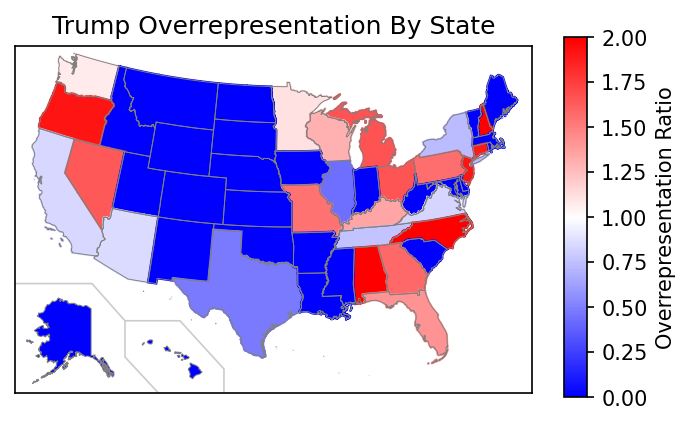

In [ ]:
plot_map(state_trump_prevalences, national_trump_prevalence, title='Trump Overrepresentation By State', vmin=0.0, vmax=2.0)

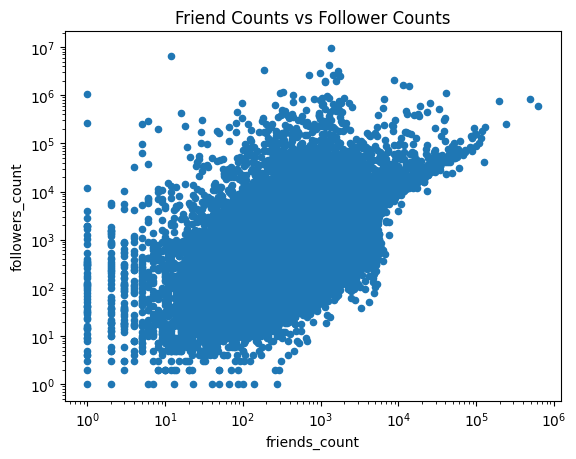

In [ ]:
census_sample.plot.scatter(x='friends_count', y='followers_count', loglog=True, title='Friend Counts vs Follower Counts')
plt.show()

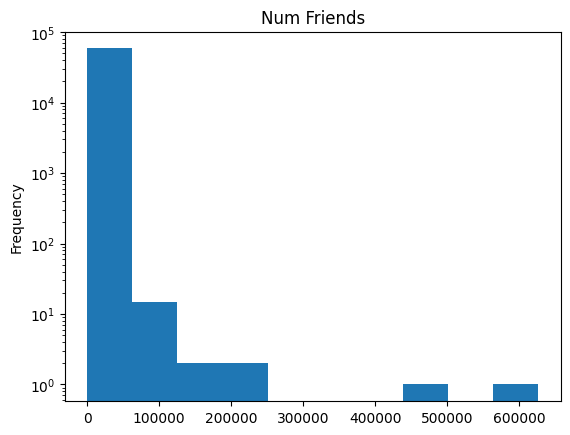

In [ ]:
census_sample['friends_count'].plot.hist(logy=True, title='Num Friends')
plt.show()

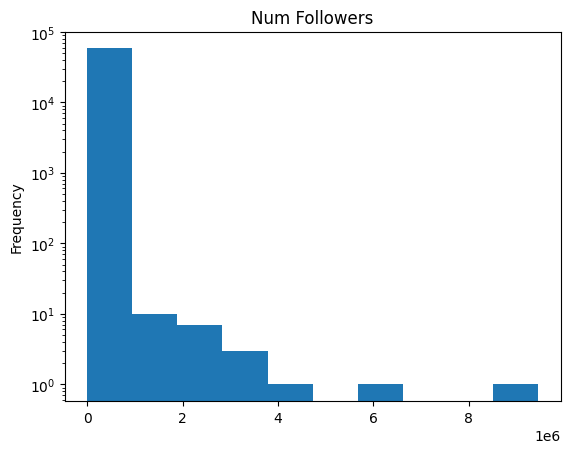

In [ ]:
census_sample['followers_count'].plot.hist(logy=True, title="Num Followers")
plt.show()

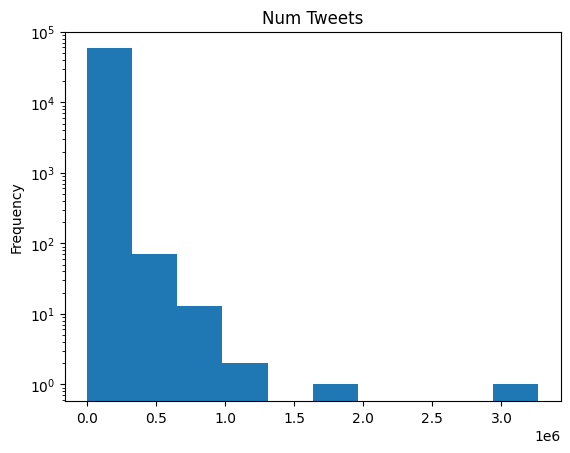

In [ ]:
census_sample['statuses_count'].plot.hist(logy=True, title='Num Tweets')
plt.show()

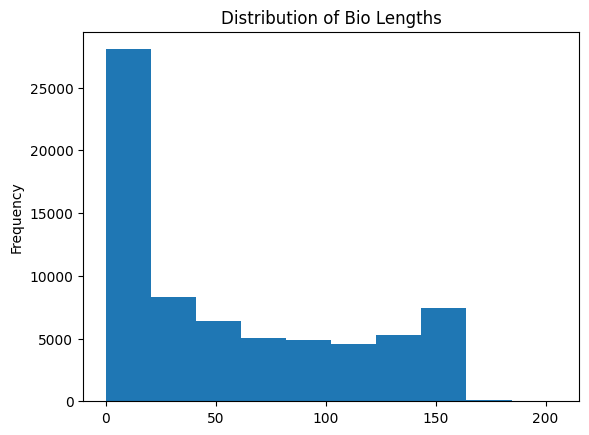

In [ ]:
census_sample['bio_length'].plot.hist(title='Distribution of Bio Lengths')
plt.show()

# 5. Large Language Models

**https://huggingface.co/**

LLMs, datasets, APIs and many more things!

You should also have a basic understanding of PyTorch!

Learn how to use Fantastic GPUs and where to find them!

In [ ]:
from transformers import pipeline

# Load a pre-trained text generation model
text_generator = pipeline("text-generation", model="gpt2")

# Generate text based on a prompt
prompt = "In a future world where AI has become"
generated_text = text_generator(prompt, max_length=50, num_return_sequences=1)
print("Generated Text:")
print(generated_text[0]['generated_text'])

# Load a pre-trained sentiment analysis model
sentiment_analyzer = pipeline("sentiment-analysis")

# Analyze sentiment of a given text
text = "I absolutely love the new features in this product!"
sentiment = sentiment_analyzer(text)
print("\nSentiment Analysis:")
print(sentiment)

# Complexity notes:
# - Text generation and sentiment analysis are O(n) with respect to the input size, but vary with model complexity.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Generated Text:
In a future world where AI has become our strongest trading competitor we would likely find it difficult or impractical to sell stocks in this fashion.

The other side is quite different. There are many companies and individuals (not all of us have the same


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]


Sentiment Analysis:
[{'label': 'POSITIVE', 'score': 0.9998735189437866}]


# 6. Advanced Materials

* Sync vs Async functions
* Parallel Processing in Python